In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv') 

In [3]:
# isolating all the numerical values and storing them
categoricals = df.select_dtypes(include='object')

# isolating all the categorical and storing them
numericals = df.select_dtypes(include='number')

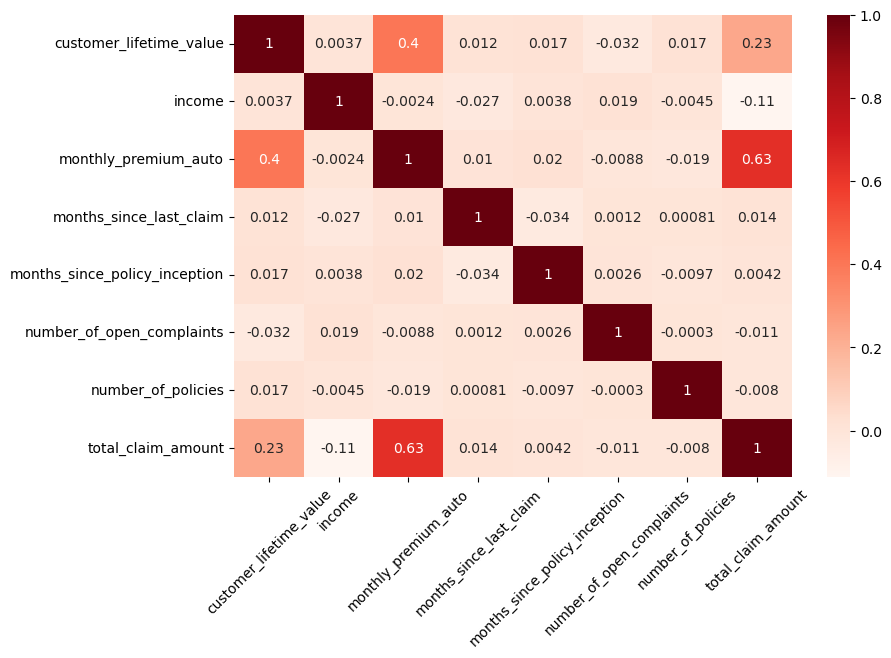

In [4]:
# checking for highly correlated features
heatmap = plt.figure(figsize=(9,6))
sns.heatmap(numericals.corr(), cmap='Reds', annot=True)
plt.xticks(rotation=45)
plt.show()

In [5]:
# dropping the 'effective_to_date' column
categoricals = categoricals.drop(['effective_to_date'], axis=1)

In [6]:
# getting dummies for the categorical columns
dummies = pd.get_dummies(categoricals, drop_first=True)

In [7]:
dummies.head()

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


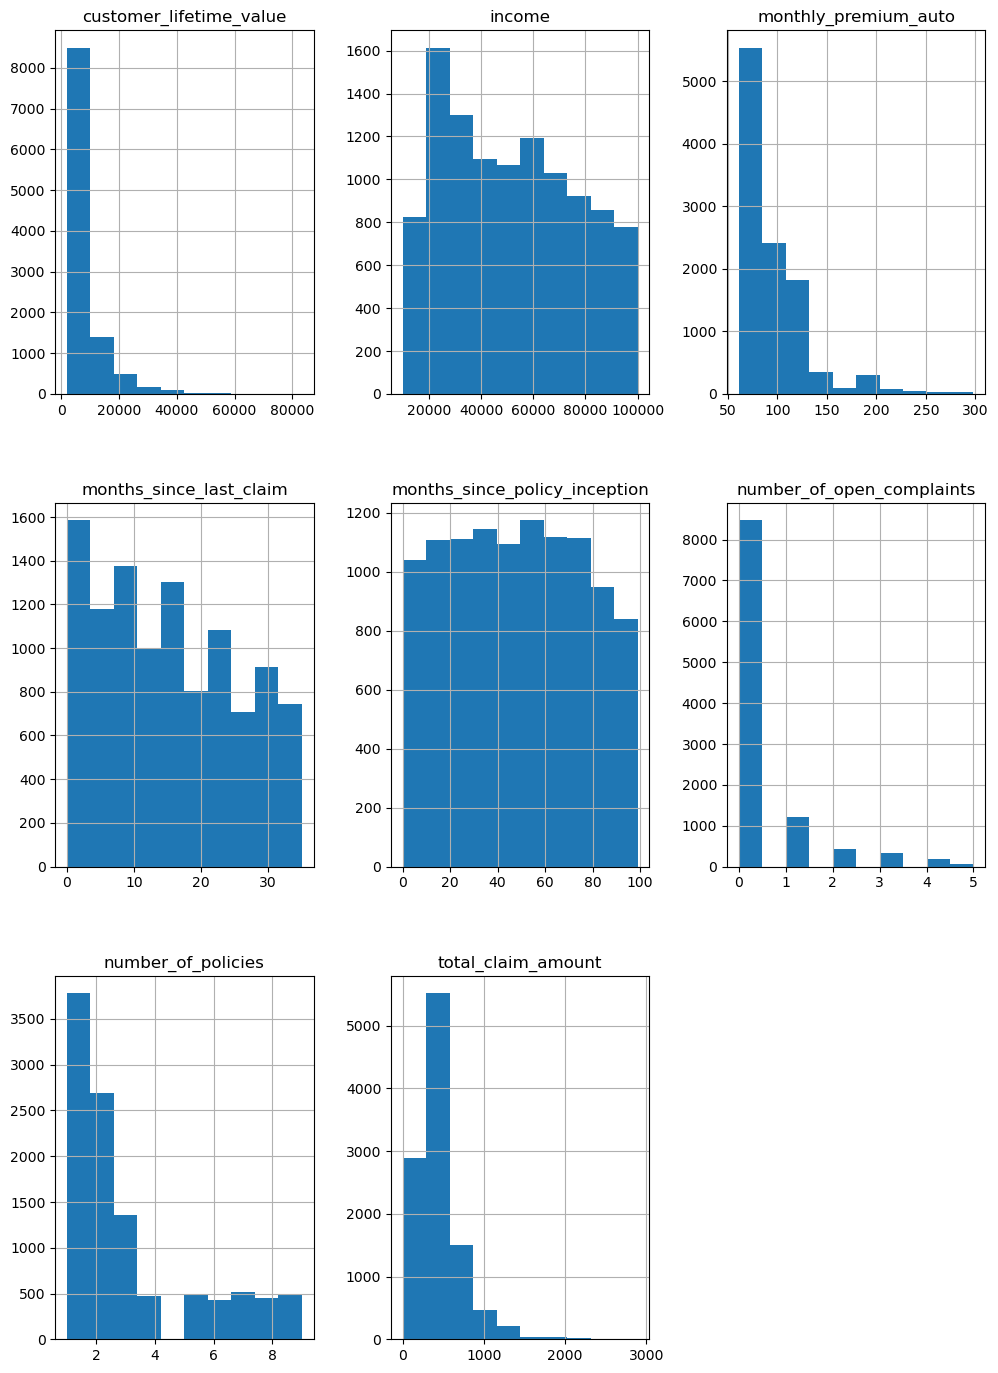

In [8]:
# visually examining the distributions
numericals.hist(figsize=(12,17))
plt.show()

In [9]:
# creating a new scaled column for the 'income' column (varA)
scaler = MinMaxScaler()
scaler.fit(numericals[['income']])
numericals['income_scaled'] = scaler.transform(numericals[['income']])

<AxesSubplot:xlabel='income_scaled', ylabel='Count'>

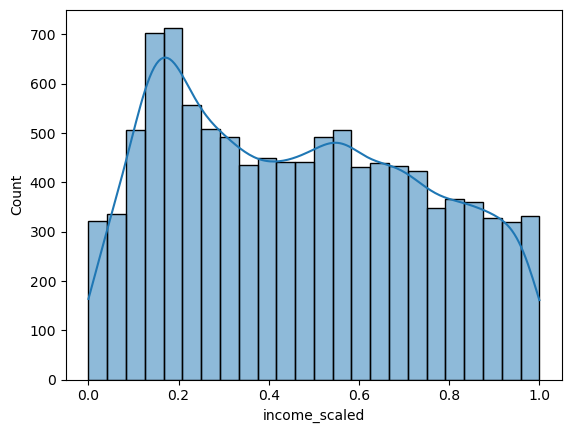

In [10]:
# plotting the new normalized column
sns.histplot(data=numericals, x=numericals['income_scaled'], kde=True)

In [11]:
# creating a new scaled column for the 'customer_lifetime_value' column (varB)
pt = PowerTransformer()
pt = PowerTransformer(method='yeo-johnson')
pt.fit(numericals[['customer_lifetime_value']])
numericals['customer_lifetime_value_scaled'] = pt.transform(numericals[['customer_lifetime_value']])

<AxesSubplot:xlabel='customer_lifetime_value_scaled', ylabel='Count'>

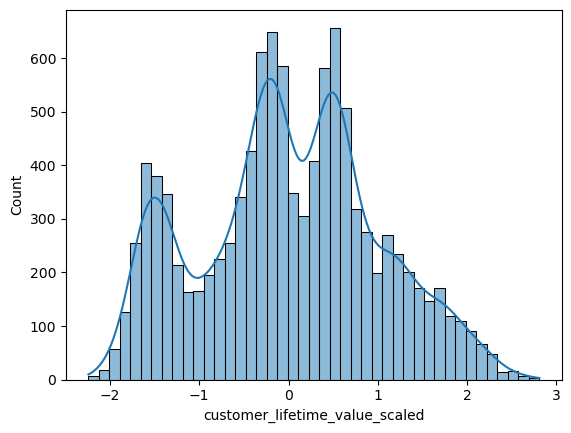

In [12]:
# plotting the new normalized column
sns.histplot(data=numericals, x=numericals['customer_lifetime_value_scaled'], kde=True)

In [13]:
numericals['customer_lifetime_value_scaled'].describe().round()

count    10689.0
mean         0.0
std          1.0
min         -2.0
25%         -1.0
50%         -0.0
75%          1.0
max          3.0
Name: customer_lifetime_value_scaled, dtype: float64

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [15]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,income_scaled,customer_lifetime_value_scaled
0,4809,48029,61,7,52,0,9,292,0.422396,-0.336143
1,2228,92260,64,3,26,0,1,744,0.914158,-1.867205
2,14947,22139,100,34,31,0,2,480,0.134550,1.292270
3,22332,49078,97,10,3,0,2,484,0.434059,1.731625
4,9025,23675,117,33,31,0,7,707,0.151628,0.646025


In [16]:
# dropping the scaled columns
numericals = numericals.drop(['income_scaled', 'customer_lifetime_value_scaled'], axis=1)

In [17]:
rand_state = 34
tt_ratio = 0.3 # test/train

In [18]:
# splitting the data to isolate the target feature
y = numericals.total_claim_amount
X = numericals.drop('total_claim_amount', axis=1)

In [19]:
numericals = X.select_dtypes(np.number)
categoricals = X.select_dtypes(np.object)

C:\Users\Laurens\AppData\Local\Temp\ipykernel_13708\4176480879.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = X.select_dtypes(np.object)


In [20]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio, random_state=rand_state)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2705,4786,45515,61,10,33,0,9
2209,22445,80340,71,32,35,0,2
4004,6412,58776,83,20,50,2,4
1898,2254,48978,65,7,95,0,1
10016,7427,28848,96,22,54,0,7


In [21]:
# standardizing the data
pt = PowerTransformer()
ct = ColumnTransformer([("pt", pt, list(numericals.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.2s


In [22]:
X_train = pd.DataFrame(X_train_ct)
X_test_ct

,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,0.649823,-0.633250,0.960690,0.582646,-0.033143,-0.502522,1.660057
1,-0.499110,0.552571,0.915092,0.415591,0.588851,-0.502522,-1.143833
2,-0.477937,0.364965,0.891527,-0.830609,0.557616,-0.502522,-1.143833
3,-0.664449,-1.480107,-1.453068,0.971550,1.070851,1.947236,0.513168
4,1.825591,-1.264602,-0.643882,0.971550,-0.428756,-0.502522,-0.063268
...,...,...,...,...,...,...,...
3202,0.510696,0.842343,-0.932776,-0.968850,0.103386,-0.502522,-0.063268
3203,0.543247,-0.936795,-0.513634,0.055807,-0.244875,-0.502522,-0.063268
3204,0.309956,1.331340,0.241171,1.328120,1.329338,-0.502522,1.311711
3205,-1.338693,0.817804,-0.513634,-0.243334,1.012270,2.046916,-1.143833


In [23]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     490.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:52:25   Log-Likelihood:                -51659.
No. Observations:                7482   AIC:                         1.033e+05
Df Residuals:                    7474   BIC:                         1.034e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.790    156.232      0.0

In [24]:
# setting up the model
model = LinearRegression()
model.fit(X_train_ct, y_train)

LinearRegression()

In [25]:
y_pred = pd.DataFrame(model.predict(X_test_ct),columns = ['total_claim_amount']) # model prediction
y_pred_train = pd.DataFrame(model.predict(X_train_ct),columns = ['total_claim_amount'])

In [26]:
# getting the mean squared error
print(mse(y_test,y_pred))

# gettting the mean absolute error
print(mae(y_test,y_pred))

60886.70095745361
170.37062119114873


In [27]:
# getting the root of the mean squared error
rmse = np.sqrt(mse(y_test,y_pred))
print(rmse)

246.7523068938842


In [28]:
# using R2 to show how much variance of y can be explained by the independant variables
R2=r2_score(y_test,y_pred)
R2

0.30180796317709213

In [29]:
R2_test=model.score(X_test_ct,y_test)
R2_train=model.score(X_train_ct,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3002801906676329

In [30]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,pt__monthly_premium_auto,160.194712
1,pt__income,33.262896
3,pt__months_since_last_claim,3.252676
5,pt__number_of_open_complaints,2.354533
6,pt__number_of_policies,1.303446
4,pt__months_since_policy_inception,1.101306
0,pt__customer_lifetime_value,0.447316


In [31]:
numericals = df.select_dtypes(include='number')

In [32]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


In [33]:
# concating the numerical and categorical values
df_all_variables = pd.concat([numericals, dummies], axis=1)

In [34]:
df_all_variables.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0


In [35]:
# splitting the data to isolate the target feature
X = df_all_variables.drop('total_claim_amount', axis=1)
y = df_all_variables.total_claim_amount

In [36]:
rand_state = 34
tt_ratio = 0.3 # test/train

In [37]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio, random_state=rand_state)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
2705,4786,45515,61,10,33,0,9,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2209,22445,80340,71,32,35,0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4004,6412,58776,83,20,50,2,4,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1898,2254,48978,65,7,95,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10016,7427,28848,96,22,54,0,7,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [38]:
# standardizing the data
scaler = StandardScaler()
scaler.fit(df_all_variables)
scaler.transform(df_all_variables)

array([[-0.46572586, -0.15019009, -0.93544875, ..., -0.50689043,
         0.64799618, -0.48698334],
       [-0.84102197,  1.63498121, -0.84826859, ..., -0.50689043,
         0.64799618, -0.48698334],
       [ 1.00841284, -1.19511526,  0.19789327, ..., -0.50689043,
         0.64799618, -0.48698334],
       ...,
       [ 2.3092261 , -0.48082072,  3.1329585 , ..., -0.50689043,
         0.64799618, -0.48698334],
       [ 0.57568087,  0.50227264,  1.88337627, ..., -0.50689043,
         0.64799618, -0.48698334],
       [-0.16793181,  0.69386244,  0.22695332, ..., -0.50689043,
         0.64799618, -0.48698334]])

In [39]:
X_train = pd.DataFrame(X_train_ct)
X_test_ct

,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,0.649823,-0.633250,0.960690,0.582646,-0.033143,-0.502522,1.660057
1,-0.499110,0.552571,0.915092,0.415591,0.588851,-0.502522,-1.143833
2,-0.477937,0.364965,0.891527,-0.830609,0.557616,-0.502522,-1.143833
3,-0.664449,-1.480107,-1.453068,0.971550,1.070851,1.947236,0.513168
4,1.825591,-1.264602,-0.643882,0.971550,-0.428756,-0.502522,-0.063268
...,...,...,...,...,...,...,...
3202,0.510696,0.842343,-0.932776,-0.968850,0.103386,-0.502522,-0.063268
3203,0.543247,-0.936795,-0.513634,0.055807,-0.244875,-0.502522,-0.063268
3204,0.309956,1.331340,0.241171,1.328120,1.329338,-0.502522,1.311711
3205,-1.338693,0.817804,-0.513634,-0.243334,1.012270,2.046916,-1.143833


In [40]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     490.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:52:25   Log-Likelihood:                -51659.
No. Observations:                7482   AIC:                         1.033e+05
Df Residuals:                    7474   BIC:                         1.034e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.790    156.232      0.0

In [41]:
# Lab week 7

In [50]:
model=LinearRegression()
model.fit(X_train_ct, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_ct, y_train)}, Test -> {model.score(X_test_ct, y_test)}")

LinearRegression: Train -> 0.3146962915100767, Test -> 0.30180796317709213


In [52]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)
model.fit(X_train_ct, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_ct, y_train)}, Test -> {model.score(X_test_ct, y_test)}")

Lasso: Train -> 0.31469606238683945, Test -> 0.3018023732900116


In [53]:
model=Ridge(alpha=10000)
model.fit(X_train_ct, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_ct, y_train)}, Test -> {model.score(X_test_ct, y_test)}")

Ridge: Train -> 0.2196663150263941, Test -> 0.2102844774542304


In [55]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
selector = RFE(lm, n_features_to_select=8, step=1, verbose=1)
selector.fit(X_train_ct, y_train)
kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train_ct.iloc[:,kept_features].columns)
X_train = selector.transform(X_train_ct)
X_test  = selector.transform(X_test_ct)
X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)
print("Final selected features: ")
X_train

Final selected features: 


,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,-0.340765,-0.143033,-1.552039,-0.350352,-0.428756,-0.502522,1.660057
1,1.732220,1.108667,-0.712384,1.463437,-0.354308,-0.502522,-0.063268
2,0.142838,0.372284,-0.020814,0.582646,0.170412,2.032405,0.875803
3,-1.841641,-0.002560,-1.178270,-0.700972,1.525083,-0.502522,-1.143833
4,0.367618,-0.900458,0.496901,0.742711,0.302193,-0.502522,1.454127
...,...,...,...,...,...,...,...
7477,0.199678,-0.194957,0.593059,0.240451,0.650895,2.032405,0.513168
7478,0.928730,-0.082468,0.938141,0.971550,0.773350,-0.502522,-0.063268
7479,-1.511516,1.656755,-1.178270,-0.040648,-0.428756,-0.502522,-1.143833
7480,-0.980688,-1.203165,0.200536,-0.461825,-1.644616,2.032405,-1.143833
